# Case Study - Spam Detection

The main aim of this project is to demonstrate the basics of Natural Language Processing (NLP).

# Major Steps Involved:

   1.Text Data Visualisation
   2.Text Data Preprocessing
   3.Text Data To Numerical Vector Conversion using Bag of Words

# We will follow the steps mentioned below:

     1. Data Loading
     2.Exploratory Data Analysis
     3.Data Preparation
          .Train Test Split
          .Data Preprocessing (special characters, stop words, lower case, stemming, etc)
          .Converting text to numerical vector using Bag of Words
          .Preprocessing Test Data
     4.Training on Train Data
     5.Predictions on Test Data
     6.Model Evaluation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\MACHINE LEARNING\email_data.csv")

In [3]:
df.head()

Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\nth...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\n( see a...   
2        3624   ham  Subject: neon retreat\nho ho ho , we ' re arou...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\nthis deal is to ...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0

In [4]:
df.shape

(5171, 4)

# Exploratory Data Analysis

In [5]:
df['label'].value_counts()


label
ham     3672
spam    1499
Name: count, dtype: int64

In [6]:
df['label'].value_counts(normalize=True)

label
ham     0.710114
spam    0.289886
Name: proportion, dtype: float64

<Axes: xlabel='label', ylabel='count'>

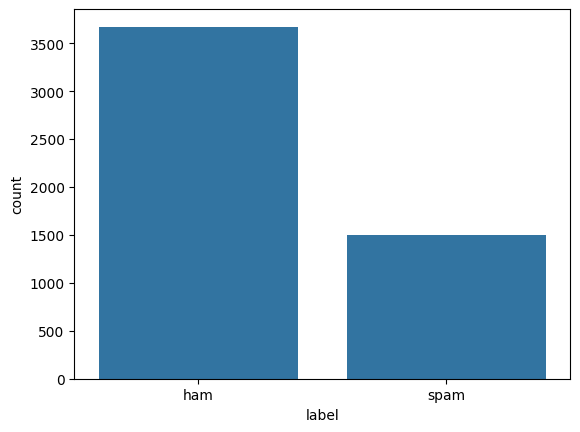

In [7]:
sns.countplot(data=df,x='label')

# Data Preparation - Split the data into train and test set

In [8]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

label                                               text  label_num
0   ham  Subject: enron methanol ; meter # : 988291\nth...          0
1   ham  Subject: hpl nom for january 9 , 2001\n( see a...          0
2   ham  Subject: neon retreat\nho ho ho , we ' re arou...          0
3  spam  Subject: photoshop , windows , office . cheap ...          1
4   ham  Subject: re : indian springs\nthis deal is to ...          0

In [10]:
y=df['label']
X=df[['text']]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.head()

text
5132  Subject: april activity surveys\nwe are starti...
2067  Subject: message subject\nhey i ' am julie ^ _...
4716  Subject: txu fuels / sds nomination for may 20...
4710  Subject: re : richardson volumes nov 99 and de...
2268  Subject: a new era of online medical care .\na...

In [13]:
X_train.shape

(4136, 1)

# Data Prepration - Text Preprocessing

In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [15]:
## initialise the inbuilt Stemmer
stemmer=PorterStemmer()

In [16]:
# We can also use Lemmatizer instead of Stemmer
lemmatizer=WordNetLemmatizer()

In [17]:
def preprocess(raw_text,flag):
     # Removing special characters and digits
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    
     # change sentence to lower cas
    sentence=sentence.lower()
    # tokenize into words
    tokens=sentence.split()
    
    # remove stop words
    clean_tokens=[word for word in tokens if not word in stopwords.words("English")]
     
    # Stemming/Lemmatization
    if (flag == 'stem'):
        clean_tokens=[stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens=[lemmatizer.lemmatize(word) for word in clean_tokens]
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])
    

In [18]:
# %%timeit

# # Convert to series
# X_train['text'].apply(lambda x: preprocess(x, 'stem'))

# # 2min 35 sec approx run time

In [19]:
pip install tqdm

In [20]:
from tqdm import tqdm,tqdm_notebook

In [21]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
tqdm.pandas()

# It seems you're also using tqdm for progress bars in your code. tqdm is a Python library that provides a fast, extensible progress bar for loops and other iterables.

To use tqdm with Pandas DataFrame's apply method, you need to import tqdm.pandas module and use progress_apply instead of apply. Similarly, you would use progress_map instead of map for Pandas Serie

In [22]:
# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
temp_df = X_train['text'].progress_apply(lambda x: preprocess(x, 'stem'))

temp_df.head()


  0%|          | 5/4136 [00:00<10:52,  6.33it/s]

100%|██████████| 4136/4136 [09:34<00:00,  7.20it/s]


0    1
5132  subject april activ survey start collect data ...   88
2067  subject messag subject hey juli turn high scho...   44
4716  subject txu fuel sd nomin may attach may nomin...   34
4710  subject richardson volum nov dec meter nick su...  105
2268  subject new era onlin medic care new era onlin...   36

In [23]:
temp_df.columns=['clean_text_stem','text_length_stem']

In [24]:
temp_df.head()

clean_text_stem  text_length_stem
5132  subject april activ survey start collect data ...                88
2067  subject messag subject hey juli turn high scho...                44
4716  subject txu fuel sd nomin may attach may nomin...                34
4710  subject richardson volum nov dec meter nick su...               105
2268  subject new era onlin medic care new era onlin...                36

In [25]:
X_train=pd.concat([X_train,temp_df],axis=1)
X_train.head()

text  \
5132  Subject: april activity surveys\nwe are starti...   
2067  Subject: message subject\nhey i ' am julie ^ _...   
4716  Subject: txu fuels / sds nomination for may 20...   
4710  Subject: re : richardson volumes nov 99 and de...   
2268  Subject: a new era of online medical care .\na...   

                                        clean_text_stem  text_length_stem  
5132  subject april activ survey start collect data ...                88  
2067  subject messag subject hey juli turn high scho...                44  
4716  subject txu fuel sd nomin may attach may nomin...                34  
4710  subject richardson volum nov dec meter nick su...               105  
2268  subject new era onlin medic care new era onlin...                36

In [26]:
temp_df=X_train['text'].progress_apply(lambda x: preprocess(x,'leema'))

  0%|          | 0/4136 [00:00<?, ?it/s]

100%|██████████| 4136/4136 [08:37<00:00,  8.00it/s]


In [27]:
temp_df.head()

0    1
5132  subject april activity survey starting collect...   88
2067  subject message subject hey julie turned high ...   44
4716  subject txu fuel sd nomination may attached ma...   34
4710  subject richardson volume nov dec meter nick s...  105
2268  subject new era online medical care new era on...   36

In [28]:
temp_df.columns=['clean_text_leema','text_length_leema']
temp_df.head()

clean_text_leema  text_length_leema
5132  subject april activity survey starting collect...                 88
2067  subject message subject hey julie turned high ...                 44
4716  subject txu fuel sd nomination may attached ma...                 34
4710  subject richardson volume nov dec meter nick s...                105
2268  subject new era online medical care new era on...                 36

In [29]:
X_train=pd.concat([X_train,temp_df],axis=1)
X_train.head()


text  \
5132  Subject: april activity surveys\nwe are starti...   
2067  Subject: message subject\nhey i ' am julie ^ _...   
4716  Subject: txu fuels / sds nomination for may 20...   
4710  Subject: re : richardson volumes nov 99 and de...   
2268  Subject: a new era of online medical care .\na...   

                                        clean_text_stem  text_length_stem  \
5132  subject april activ survey start collect data ...                88   
2067  subject messag subject hey juli turn high scho...                44   
4716  subject txu fuel sd nomin may attach may nomin...                34   
4710  subject richardson volum nov dec meter nick su...               105   
2268  subject new era onlin medic care new era onlin...                36   

                                       clean_text_leema  text_length_leema  
5132  subject april activity survey starting collect...                 88  
2067  subject message subject hey julie turned high ...                 44  
4716  subject txu fuel sd nomination may attached ma...                 34  
4710  subject richardson volume nov dec meter nick s...                105  
2268  subject new era online medical care new era on...                 36

# Creating the WordCloud

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

In [32]:
y_train

5132     ham
2067    spam
4716     ham
4710     ham
2268    spam
        ... 
4426     ham
466      ham
3092    spam
3772     ham
860      ham
Name: label, Length: 4136, dtype: object

In [33]:
spam_df= X_train.loc[y_train=='spam',:]
spam_df.head()

text  \
2067  Subject: message subject\nhey i ' am julie ^ _...   
2268  Subject: a new era of online medical care .\na...   
4998  Subject: sparkasse security issue\nsehr geehrt...   
366   Subject: druuugs onliiiiine very cheaaaap\nhel...   
2683  Subject: survivor junction\na genuine college ...   

                                        clean_text_stem  text_length_stem  \
2067  subject messag subject hey juli turn high scho...                44   
2268  subject new era onlin medic care new era onlin...                36   
4998  subject sparkass secur issu sehr geehrt kundin...               132   
366   subject druuug onliiiiin cheaaaap hello calvin...                50   
2683  subject survivor junction genuin colleg degre ...               139   

                                       clean_text_leema  text_length_leema  
2067  subject message subject hey julie turned high ...                 44  
2268  subject new era online medical care new era on...                 36  
4998  subject sparkasse security issue sehr geehrte ...                132  
366   subject druuugs onliiiiine cheaaaap hello calv...                 50  
2683  subject survivor junction genuine college degr...                139

In [34]:
words=' '.join(spam_df['clean_text_leema'])
print(words[:100])

subject message subject hey julie turned high school senior houston tx waiting long time day finally


In [35]:
spam_df=X_train.loc[y_train=='spam',:]
words=' '.join(spam_df['clean_text_leema'])
clean_word=' '.join([word for word in words.split() if 'subject' not in word])


In [36]:
spam_wordcloud=WordCloud(stopwords=stopwords.words('english'),background_color='black',width=1600,height=800).generate(clean_word)

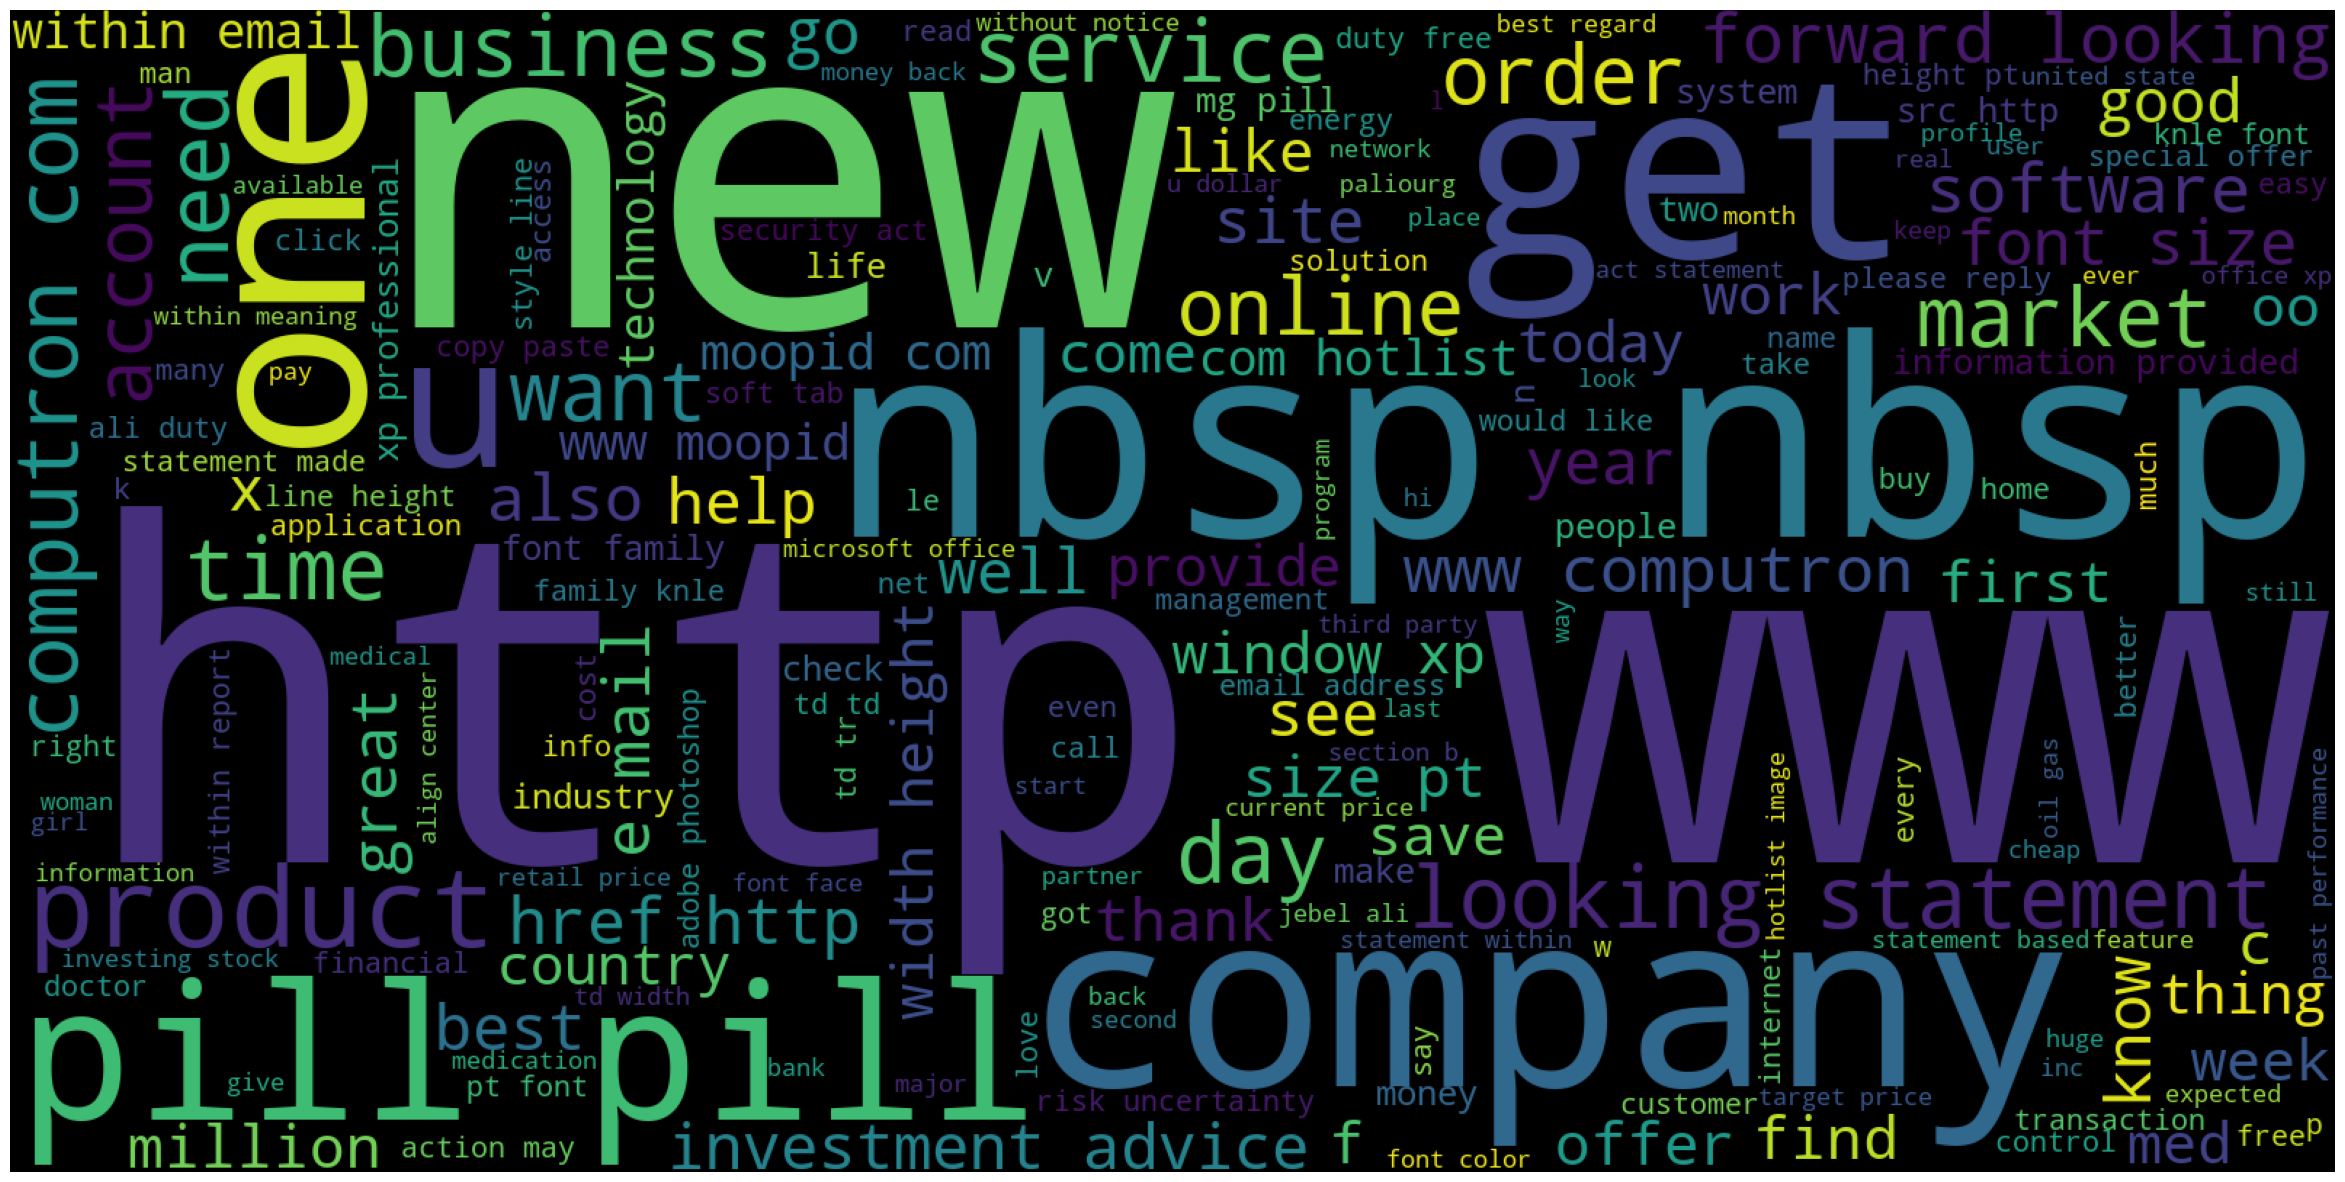

In [37]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(30,20))
plt.imshow(spam_wordcloud)
plt.axis('off')
plt.show()

In [38]:
ham_df=X_train.loc[y_train =='ham',:]

In [39]:
words=' '.join(ham_df["clean_text_leema"])
print(words[100:])

cial team please select rcs fill driver quantity requested driver month february please fill attached activity driver survey april number rc end day thursday may th group currently generates standard report capture surveyed data please send report put recipient list beginning next month eliminate need fill survey every month would like u collect information someone within team beginning next month let know please contact lisa cousino x unable complete survey within allotted time thanks shari subject txu fuel sd nomination may attached may nomination take gas sale purchase contract txu fuel company previously tufco sd please advise question concerning attached thanks cc see attached file sdsnom xl sdsnom xl subject richardson volume nov dec meter nick sure happened volume cannot tell audit trail connection meter hpl meter midt volume referring mid tex pipeline meter pathed point point nom deal reference think correct deal reference show hplc purchaser volume mips meter supply deal set h

In [40]:
words=' '.join(ham_df["clean_text_leema"])
clean_word= ' '.join([ word for word in words.split() if 'subject' not in word])

In [41]:
ham_wordcloud=WordCloud(stopwords=stopwords.words('english'),background_color='Yellow',width=1600,height=800).generate(clean_word)

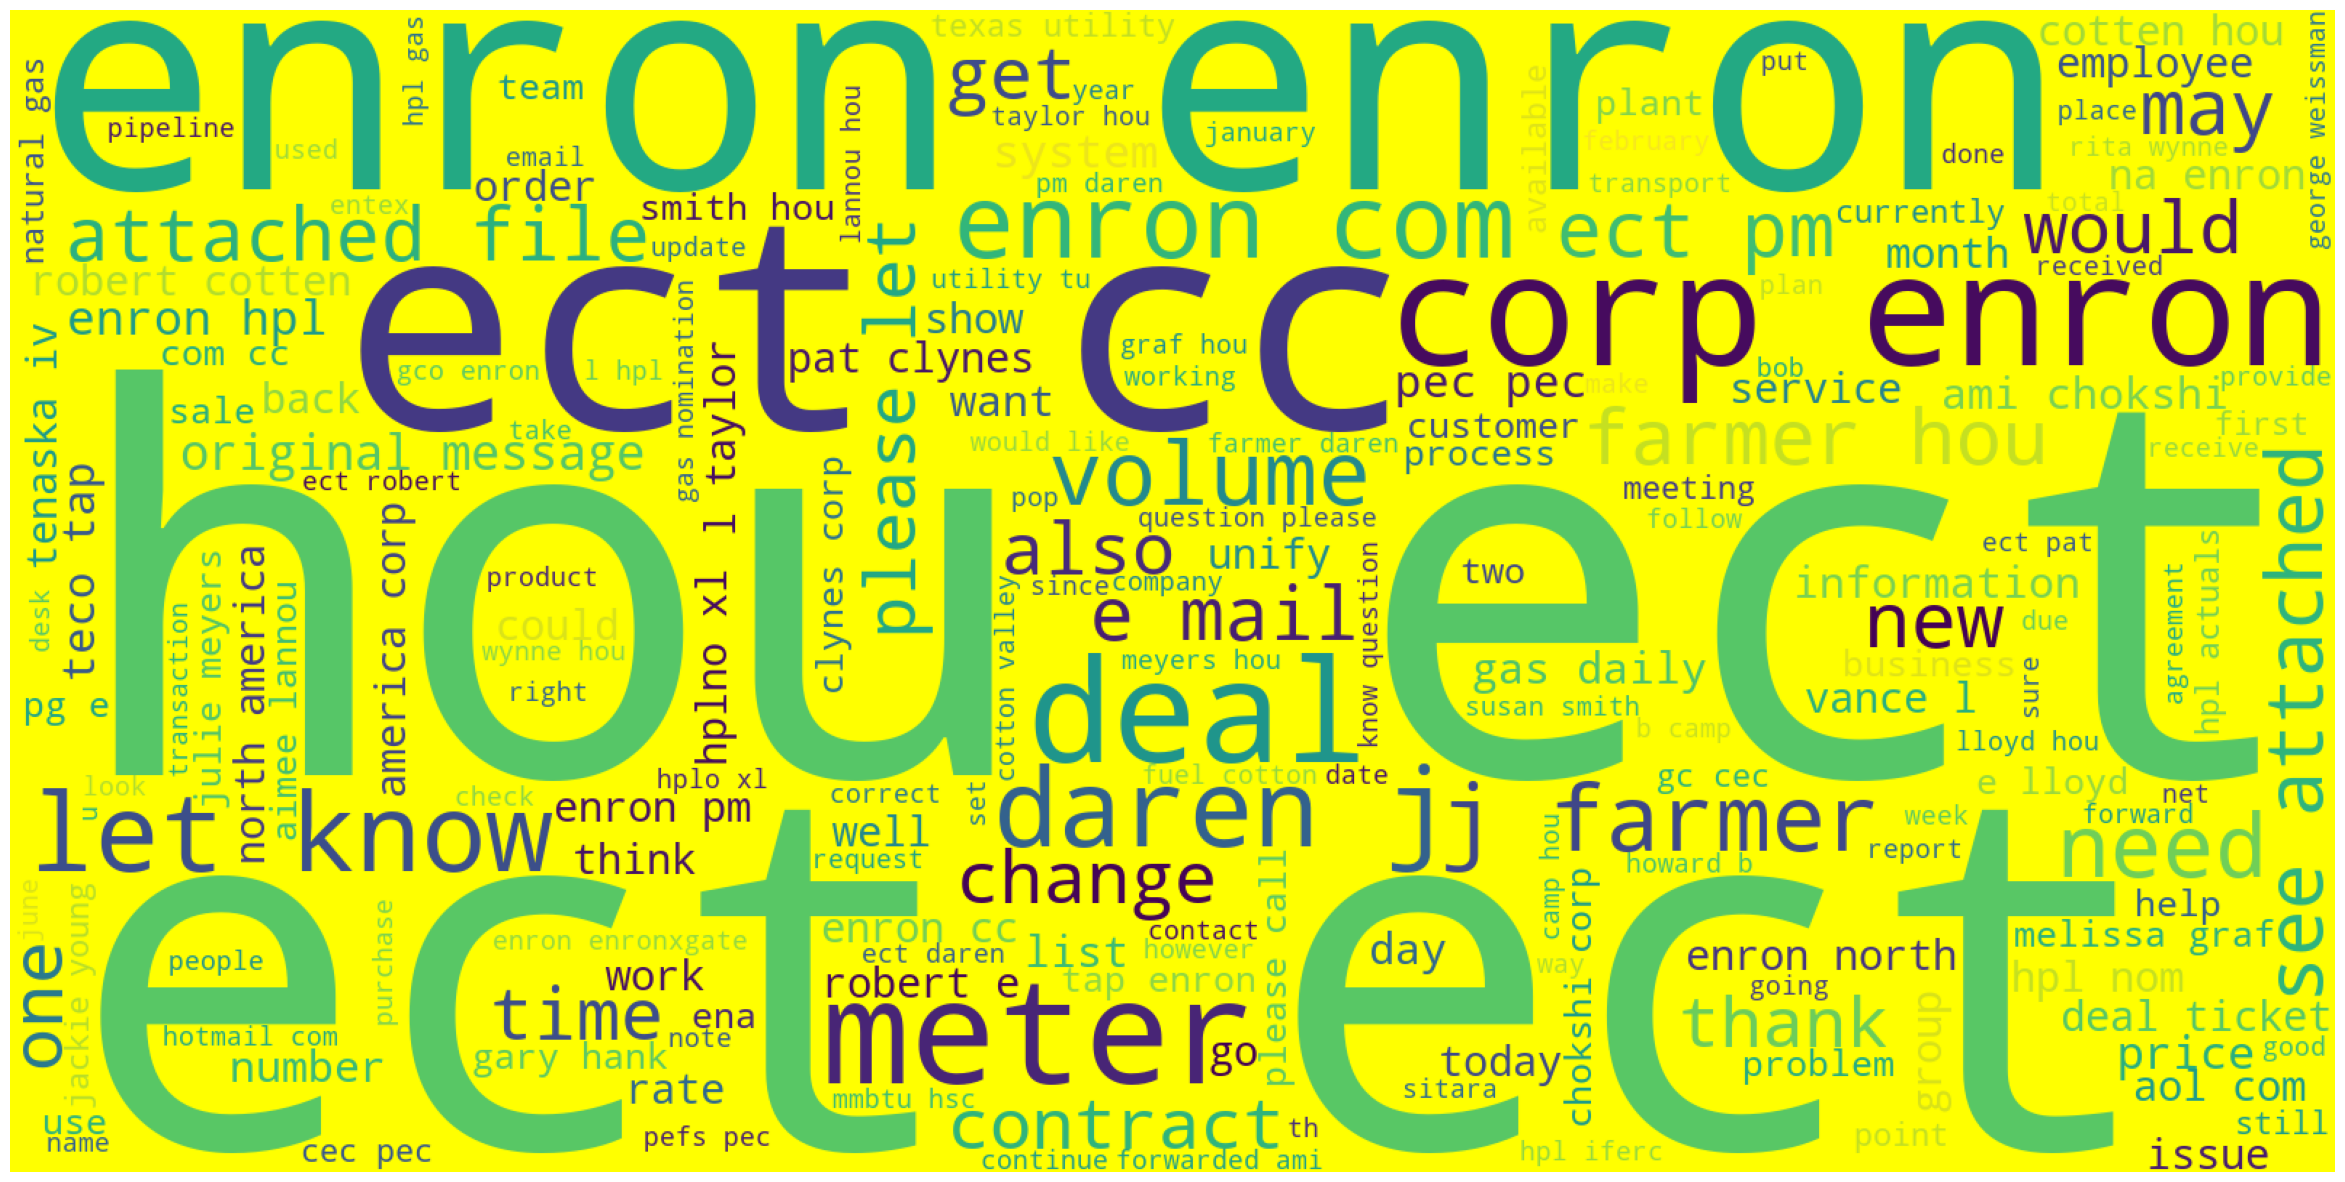

In [42]:
plt.figure(1,figsize=(30,20))
plt.imshow(ham_wordcloud)
plt.axis('off')
plt.show()

# Converting Text to Numerical vectors - BOW Representation

    Step 1 - Learn the vocabulary from the train data
    Step 2 - Transform the train['emails'] to X_train (i.e. DTM)
    Step 3 - Transform the test['emails'] to X_test (i.e. DTM)

In [43]:
X_train.head()

text  \
5132  Subject: april activity surveys\nwe are starti...   
2067  Subject: message subject\nhey i ' am julie ^ _...   
4716  Subject: txu fuels / sds nomination for may 20...   
4710  Subject: re : richardson volumes nov 99 and de...   
2268  Subject: a new era of online medical care .\na...   

                                        clean_text_stem  text_length_stem  \
5132  subject april activ survey start collect data ...                88   
2067  subject messag subject hey juli turn high scho...                44   
4716  subject txu fuel sd nomin may attach may nomin...                34   
4710  subject richardson volum nov dec meter nick su...               105   
2268  subject new era onlin medic care new era onlin...                36   

                                       clean_text_leema  text_length_leema  
5132  subject april activity survey starting collect...                 88  
2067  subject message subject hey julie turned high ...                 44  
4716  subject txu fuel sd nomination may attached ma...                 34  
4710  subject richardson volume nov dec meter nick s...                105  
2268  subject new era online medical care new era on...                 36

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vocab=CountVectorizer()
X_train_bow=vocab.fit_transform(X_train['clean_text_leema'])

In [45]:
X_train_bow

<4136x38693 sparse matrix of type '<class 'numpy.int64'>'
	with 252668 stored elements in Compressed Sparse Row format>

In [46]:
print('total length uique:',len(vocab.vocabulary_))
print("Type of train features:",type(X_train_bow))
print('Shape of the input data:',X_train_bow.shape)

total length uique: 38693
Type of train features: <class 'scipy.sparse._csr.csr_matrix'>
Shape of the input data: (4136, 38693)


In [47]:
print(X_train_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [48]:
from sys import getsizeof
print(type(X_train_bow))
print(getsizeof(X_train_bow),"bytes")

<class 'scipy.sparse._csr.csr_matrix'>
48 bytes


In [49]:
print(type(X_train_bow.toarray()))
print(getsizeof(X_train_bow.toarray()),'bytes')

<class 'numpy.ndarray'>
1280274112 bytes


# Preprocessing the Test Data

In [50]:
X_test.head()

text
1566  Subject: hpl nom for march 30 , 2001\n( see at...
1988  Subject: online pharxmacy 80 % off all meds\nd...
1235  Subject: re : nom / actual volume for april 17...
2868  Subject: re : meter 8740 dec 99\nrobert and i ...
4903  Subject: re : coastal oil & gas corporation\nm...

In [51]:
temp_df=X_test['text'].progress_apply(lambda x:preprocess(x,'leema'))
temp_df.head()

  0%|          | 0/1035 [00:00<?, ?it/s]

100%|██████████| 1035/1035 [02:12<00:00,  7.82it/s]


0     1
1566  subject hpl nom march see attached file hplno ...    11
1988  subject online pharxmacy med disscount phafrma...  2590
1235  subject nom actual volume april th agree eilee...    44
2868  subject meter dec robert put head together dec...   332
4903  subject coastal oil gas corporation melissa de...  1241

In [52]:
temp_df.columns=['clean_text_leema','length_text_leema']
temp_df.head()

clean_text_leema  length_text_leema
1566  subject hpl nom march see attached file hplno ...                 11
1988  subject online pharxmacy med disscount phafrma...               2590
1235  subject nom actual volume april th agree eilee...                 44
2868  subject meter dec robert put head together dec...                332
4903  subject coastal oil gas corporation melissa de...               1241

In [53]:
X_test=pd.concat([X_test,temp_df],axis=1)
X_test.head()

text  \
1566  Subject: hpl nom for march 30 , 2001\n( see at...   
1988  Subject: online pharxmacy 80 % off all meds\nd...   
1235  Subject: re : nom / actual volume for april 17...   
2868  Subject: re : meter 8740 dec 99\nrobert and i ...   
4903  Subject: re : coastal oil & gas corporation\nm...   

                                       clean_text_leema  length_text_leema  
1566  subject hpl nom march see attached file hplno ...                 11  
1988  subject online pharxmacy med disscount phafrma...               2590  
1235  subject nom actual volume april th agree eilee...                 44  
2868  subject meter dec robert put head together dec...                332  
4903  subject coastal oil gas corporation melissa de...               1241

In [54]:
X_test_bow=vocab.transform(X_test['clean_text_leema'])

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train_bow,y_train)

LogisticRegression()

In [56]:
y_test_predict=classifier.predict(X_test_bow)

In [57]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.9835748792270531
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       742
        spam       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_bow,y_train)

DecisionTreeClassifier()

In [59]:
y_test_predict=DT.predict(X_test_bow)

In [60]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))

0.9487922705314009
              precision    recall  f1-score   support

         ham       0.97      0.96      0.96       742
        spam       0.90      0.92      0.91       293

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035



# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_bow,y_train)

RandomForestClassifier()

In [62]:
y_test_predict=classifier.predict(X_test_bow)

In [63]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_test_predict))
print(classification_report(y_test,y_test_predict))
      

0.9739130434782609
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       742
        spam       0.94      0.97      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035

